In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
import time

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

%matplotlib inline


## Import wine data

From here: https://www.kaggle.com/xuzihe2010/wine-quality-red#winequality-white.csv

In [2]:
white = pd.read_csv('wine-quality-red/winequality-white.csv', sep=';')

In [3]:
white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [4]:
red = pd.read_csv('wine-quality-red/winequality-red.csv', sep=';')

In [5]:
red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

## Label and combine data

In [6]:
white['color'] = 'white'
white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  color  
0      8.8        6  white  
1      9.5        6  white  
2     10.1        6  white  
3      9.9        6  white  
4      9.9        6  white

In [7]:
red['color'] = 'red'
wine = pd.concat((white, red))
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  color  
0      8.8        6  white  
1      9.5        6  white  
2     10.1        6  white  
3      9.9        6  white  
4      9.9        6  white

In [8]:
wine.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality color  
1594     10.5        5   red  
1595     11.2        6   red  
1596     11.0        6   red  
1597     10.2        5   red  
1598     11.0        6   red

In [9]:
wine.reset_index(inplace=True)
wine.drop('index', axis=1, inplace=True)
wine.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality color  
6492     10.5        5   red  
6493     11.2        6   red  
6494     11.0        6   red  
6495     10.2        5   red  
6496     11.0        6   red

## Check for null values

In [10]:
wine.loc[wine.isnull().any(axis=1),]

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, color]
Index: []

In [11]:
## No need to create dummies as all numeric.

## Split into train and test data

In [12]:
variables = wine.drop('color', axis=1)
outcome = wine['color']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(variables, outcome, test_size=0.3, random_state = 394, stratify=outcome)

## Create decision trees

#### Decision tree 1

In [14]:
## Start timer

start_time_1 = time.time()

decision_tree_1 = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4
)

decision_tree_1.fit(x_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time_1))

--- 0.018758773803710938 seconds ---


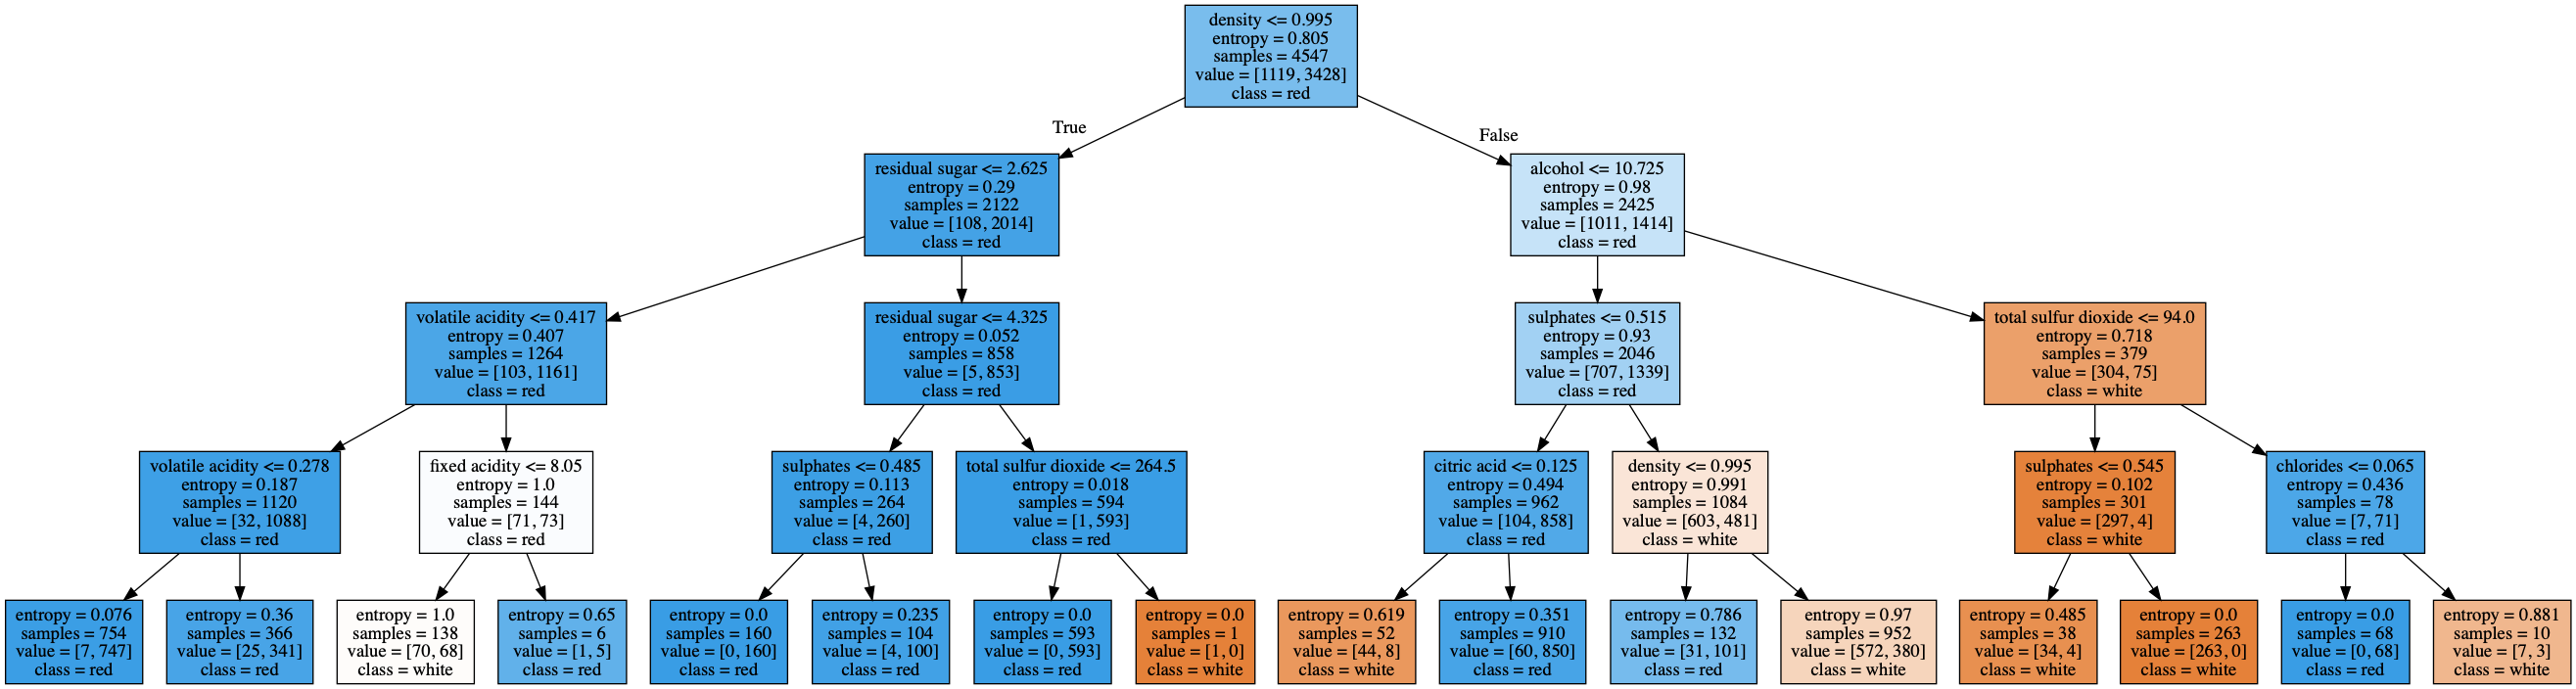

In [15]:
dot_data_1 = tree.export_graphviz(
    decision_tree_1, out_file=None,
    feature_names=variables.columns,
    class_names=['white', 'red'],
    filled=True
)
graph_1 = pydotplus.graph_from_dot_data(dot_data_1)
Image(graph_1.create_png())

In [16]:
y_predict_1 = decision_tree_1.predict(x_test)
accuracy_score(y_test, y_predict_1)

0.8666666666666667

In [17]:
## Cross validation - different score each time as retrains model.
cv_1 = cross_val_score(decision_tree_1, variables, outcome, cv=5)
print(cv_1)
print(cv_1.mean())

[0.92307692 0.95076923 0.92307692 0.89299461 0.92064715]
0.9221129675246402


#### Decision tree 2

In [18]:
## Start timer

start_time_2 = time.time()

## Start model

decision_tree_2 = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4
)

decision_tree_2.fit(x_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time_2))

--- 0.011920928955078125 seconds ---


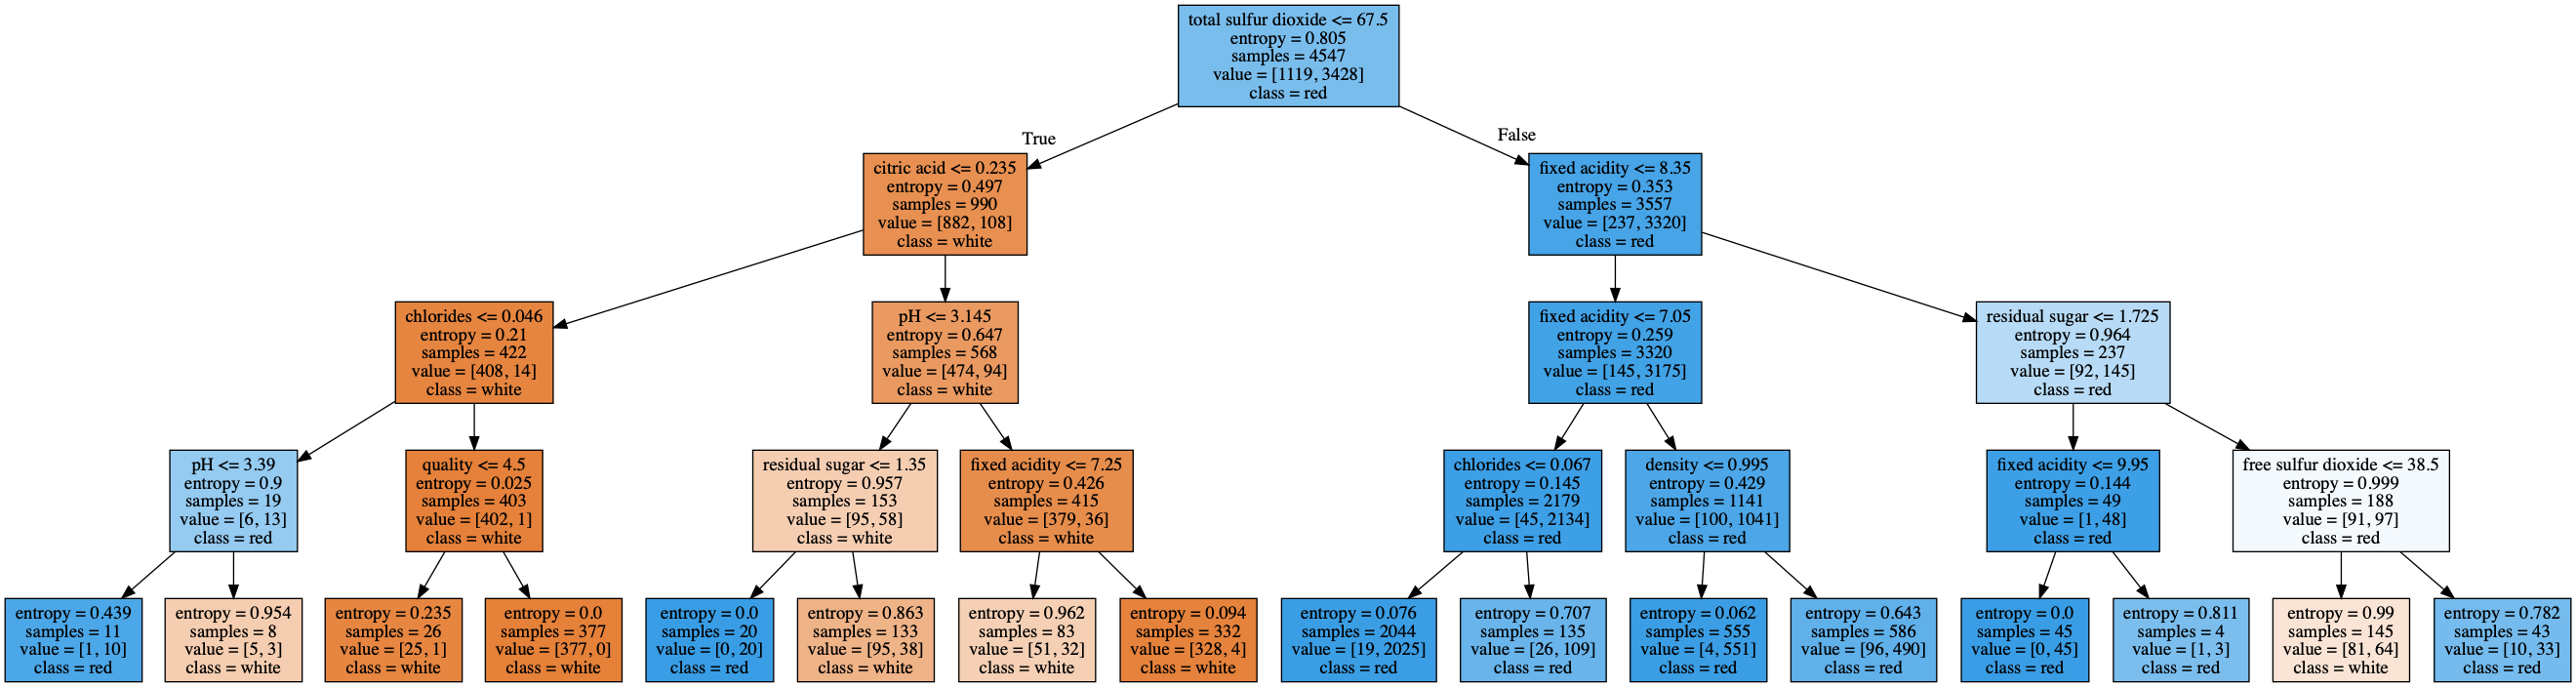

In [19]:
dot_data_2 = tree.export_graphviz(
    decision_tree_2, out_file=None,
    feature_names=variables.columns,
    class_names=['white', 'red'],
    filled=True
)
graph_2 = pydotplus.graph_from_dot_data(dot_data_2)
Image(graph_2.create_png())

In [20]:
y_predict_2 = decision_tree_2.predict(x_test)
accuracy_score(y_test, y_predict_2)

0.9358974358974359

In [21]:
## Different score each time as retrains model (same inputs as model 1)

cv_2 = cross_val_score(decision_tree_2, variables, outcome, cv=5)
print(cv_2)
print(cv_2.mean())

[0.91       0.87615385 0.89923077 0.95073133 0.89753467]
0.9067301231798824


#### Decision tree 3

In [22]:
## Start timer

start_time_3 = time.time()

## Start model

decision_tree_3 = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=None
)

decision_tree_3.fit(x_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time_3))

--- 0.010509014129638672 seconds ---


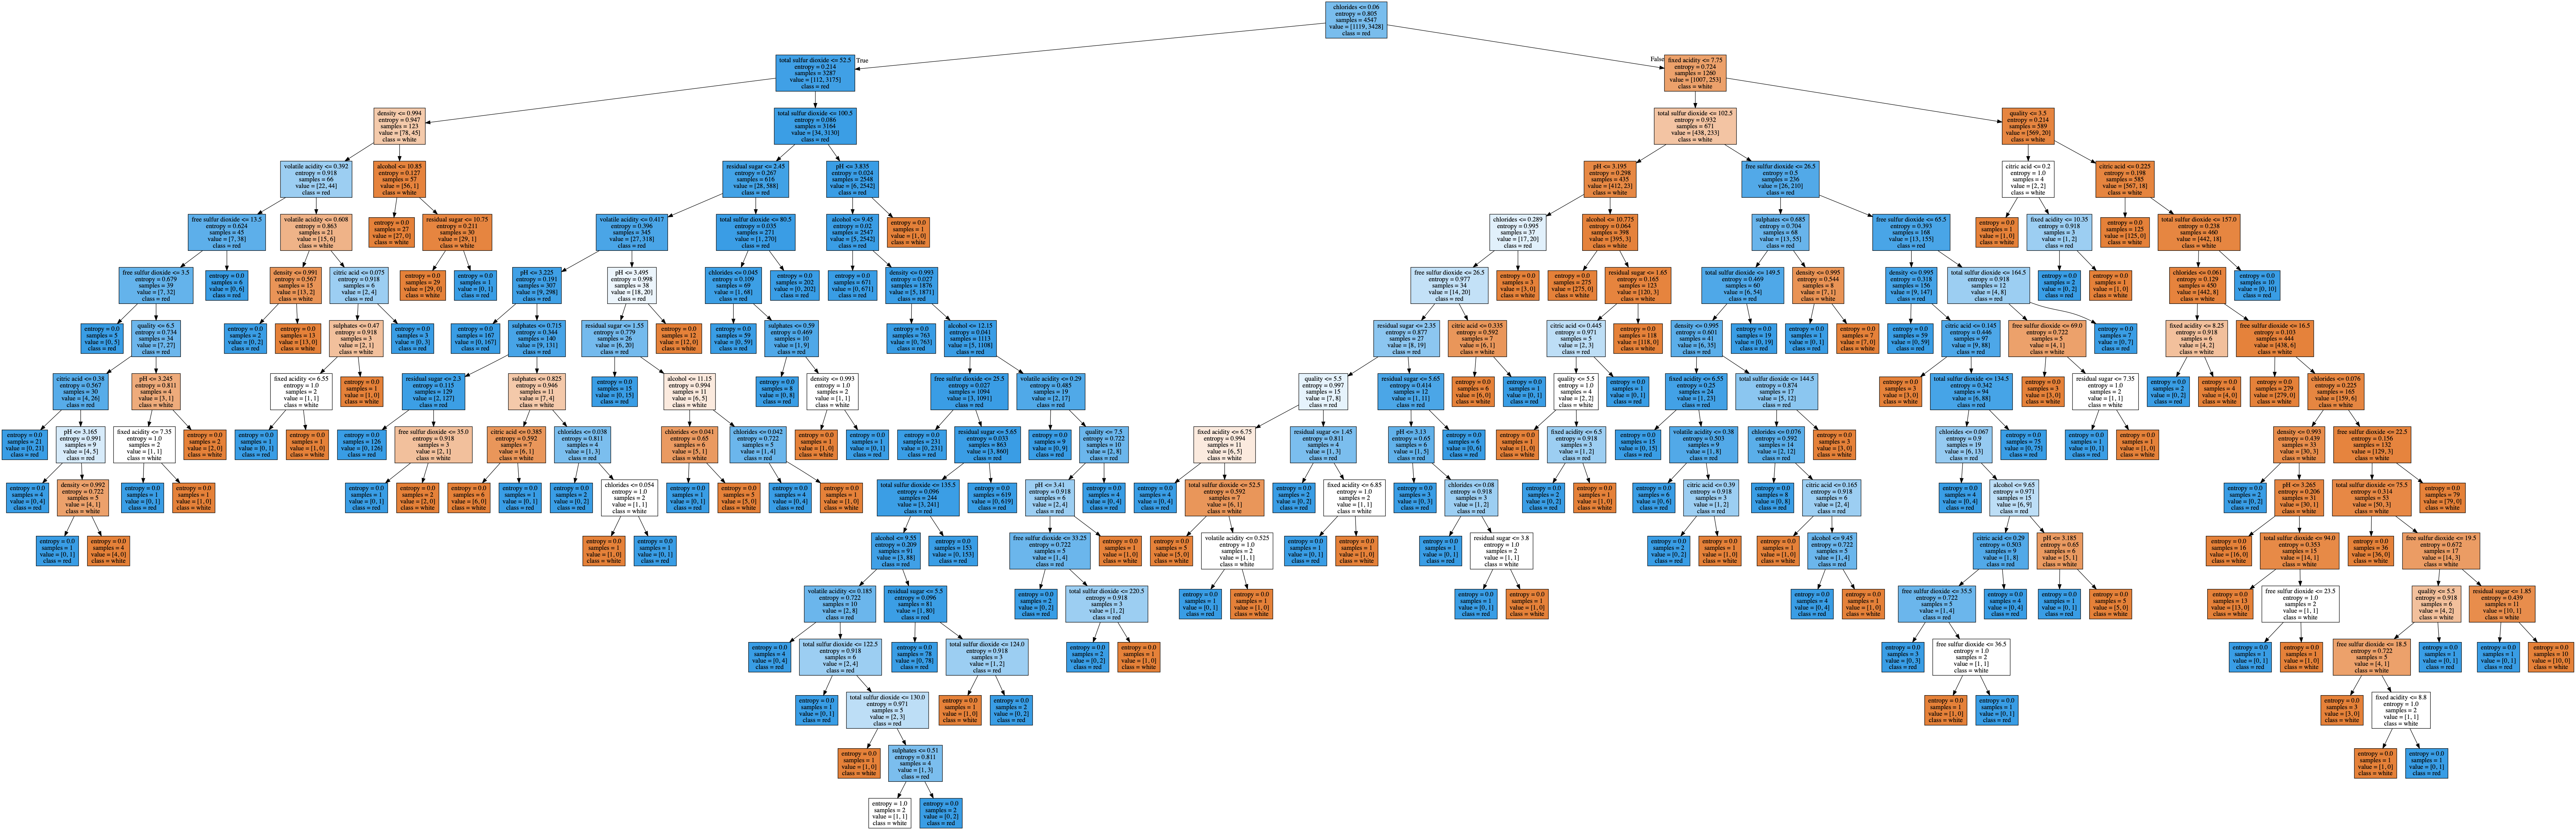

In [23]:
dot_data_3 = tree.export_graphviz(
    decision_tree_3, out_file=None,
    feature_names=variables.columns,
    class_names=['white', 'red'],
    filled=True
)
graph_3 = pydotplus.graph_from_dot_data(dot_data_3)
Image(graph_3.create_png())

In [24]:
y_predict_3 = decision_tree_3.predict(x_test)
accuracy_score(y_test, y_predict_3)

0.9856410256410256

In [25]:
## Different score each time as retrains model

cv_3 = cross_val_score(decision_tree_3, variables, outcome, cv=5)
print(cv_3)
print(cv_3.mean())

[0.96846154 0.92769231 0.94461538 0.94765204 0.94992296]
0.9476688458395117


#### Decision tree 4

In [26]:
start_time_4 = time.time()

decision_tree_4 = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=None,
    max_depth=6
)

decision_tree_4.fit(x_train, y_train)

print("--- %s seconds ---" %(time.time() - start_time_4))

--- 0.03069329261779785 seconds ---


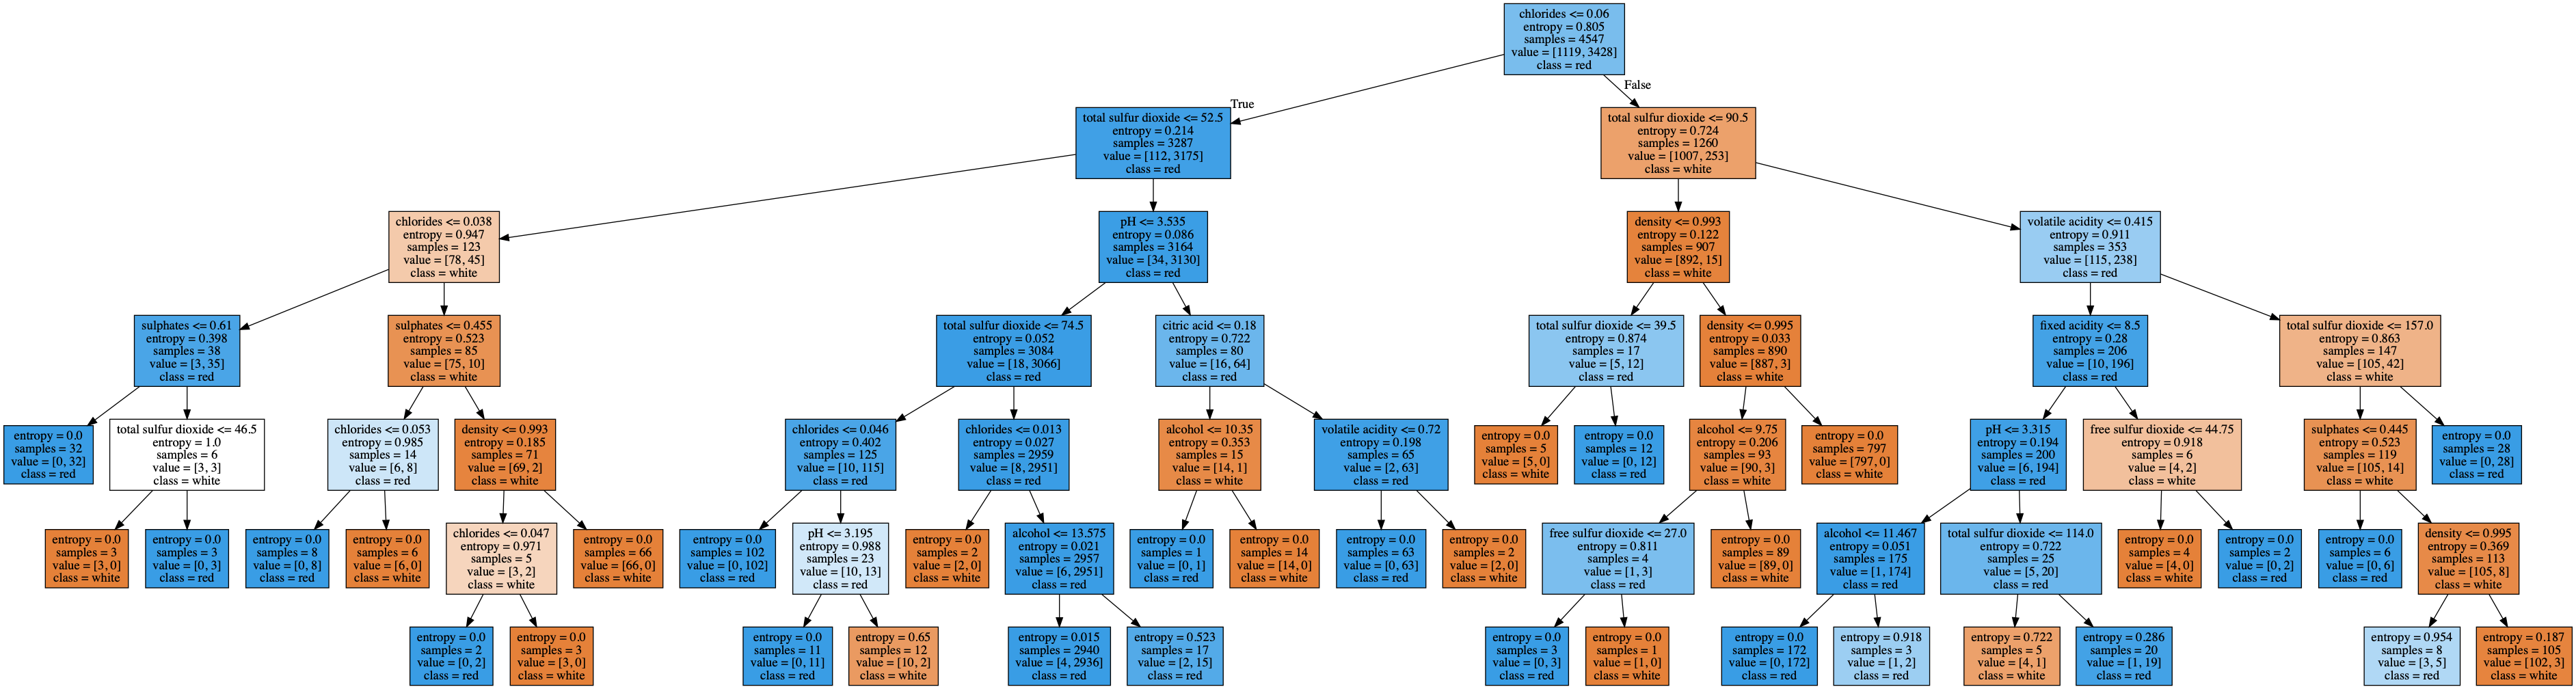

In [27]:
dot_data_4 = tree.export_graphviz(
    decision_tree_4, out_file=None,
    feature_names=x_train.columns,
    class_names=['white', 'red'],
    filled=True
)

graph_4 = pydotplus.graph_from_dot_data(dot_data_4)
Image(graph_4.create_png())

In [28]:
y_predict_4 = decision_tree_4.predict(x_test)
accuracy_score(y_test, y_predict_4)

0.9851282051282051

In [29]:
## Different score each time as retrains model

cv_4 = cross_val_score(decision_tree_4, variables, outcome, cv=5)
print(cv_4)
print(cv_4.mean())

[0.98461538 0.97923077 0.98769231 0.9730562  0.97842835]
0.9806046019845682


#### Decision tree 5

In [30]:
## Start timer

start_time_5 = time.time()

decision_tree_5 = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=None,
    max_depth = 6
)

decision_tree_5.fit(x_train, y_train)

print("--- %s seconds ----" % (time.time() - start_time_5))

--- 0.02472710609436035 seconds ----


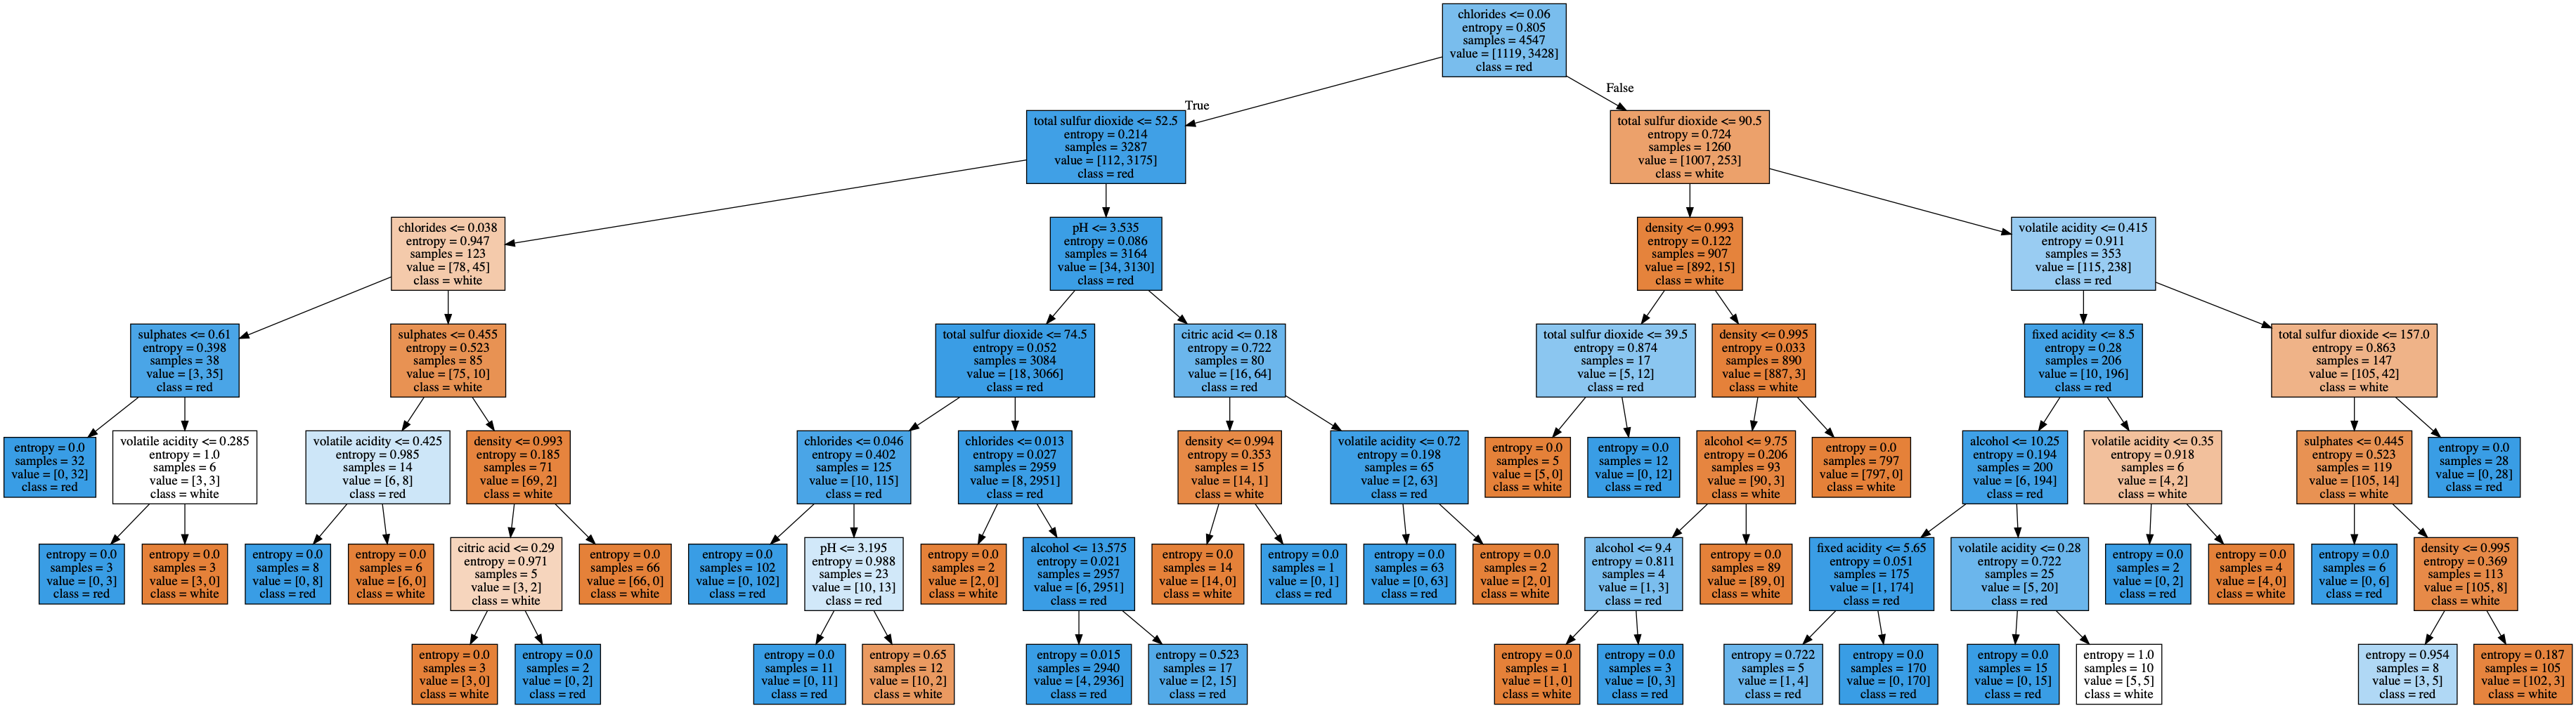

In [31]:
dot_data_5 = tree.export_graphviz(
    decision_tree_5, out_file=None,
    feature_names=x_train.columns,
    class_names=['white', 'red'],
    filled=True
)

graph_5 = pydotplus.graph_from_dot_data(dot_data_5)
Image(graph_5.create_png())

In [32]:
y_predict_5 = decision_tree_5.predict(x_test)
accuracy_score(y_test, y_predict_5)

0.9841025641025641

In [33]:
## Different score each time - same as model 4

cv_5 = cross_val_score(decision_tree_5, variables, outcome, cv=5)
print(cv_5)
print(cv_5.mean())

[0.98461538 0.98538462 0.98692308 0.9730562  0.97842835]
0.9816815250614914


## Random forest classifier
#### Random forest 1

In [34]:
start_time_1a = time.time()

rfc_1a = ensemble.RandomForestClassifier(
    criterion = 'entropy',
    max_features=1,
    max_depth=4
)
rfc_1a.fit(x_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time_1a))

--- 0.028789043426513672 seconds ---


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [35]:
y_predict_1a = rfc_1a.predict(x_test)
accuracy_score(y_test, y_predict_1a)

0.9774358974358974

In [36]:
cv_1a = cross_val_score(rfc_1a, variables, outcome, cv=5)
print(cv_1a)
print(cv_1a.mean())

[0.95846154 0.96846154 0.97307692 0.96381832 0.96687211]
0.9661380865451793


#### Random forest 2

In [37]:
start_time_2a = time.time()

rfc_2a = ensemble.RandomForestClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4
)
rfc_2a.fit(x_train, y_train)

print("--- %s seconds ---" %(time.time() - start_time_2a))

--- 0.026156902313232422 seconds ---


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
y_predict_2a = rfc_2a.predict(x_test)
accuracy_score(y_test, y_predict_2a)

0.98

In [39]:
cv_2a = cross_val_score(rfc_2a, variables, outcome, cv=5)
print(cv_2a)
print(cv_2a.mean())

[0.97615385 0.98       0.98538462 0.95765974 0.97072419]
0.9739844781723672


#### Random forest 3

In [40]:
start_time_3a = time.time()

rfc_3a = ensemble.RandomForestClassifier(
    criterion='entropy',
    max_features=1,
    max_depth = None
)
rfc_3a.fit(x_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time_3a))

--- 0.03126716613769531 seconds ---


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [41]:
y_predict_3a = rfc_3a.predict(x_test)
accuracy_score(y_test, y_predict_3a)

0.9948717948717949

In [42]:
cv_3a = cross_val_score(rfc_3a, variables, outcome, cv=5)
print(cv_3a)
print(cv_3a.mean())

[0.99076923 0.99230769 0.99230769 0.98460354 0.99691834]
0.9913812984943059


#### Random forest 4

In [43]:
start_time_4a = time.time()

rfc_4a = ensemble.RandomForestClassifier(
    criterion='entropy',
    max_features=None,
    max_depth=6
)
rfc_4a.fit(x_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time_4a))

--- 0.09909510612487793 seconds ---


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [44]:
y_predict_4a = rfc_4a.predict(x_test)
accuracy_score(y_test, y_predict_4a)

0.9887179487179487

In [45]:
cv_4a = cross_val_score(rfc_4a, variables, outcome, cv=5)
print(cv_4a)
print(cv_4a.mean())

[0.99       0.99153846 0.98692308 0.98537336 0.99075501]
0.98891798205839


#### Random forest 5

In [46]:
start_time_5a = time.time()

rfc_5a = ensemble.RandomForestClassifier(
    criterion='entropy',
    max_features=None,
    max_depth=6
)

rfc_5a.fit(x_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time_5a))

--- 0.09920930862426758 seconds ---


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [47]:
y_predict_5a = rfc_5a.predict(x_test)
accuracy_score(y_test, y_predict_5a)

0.9902564102564102

In [48]:
cv_5a = cross_val_score(rfc_5a, variables, outcome, cv=5)
print(cv_5a)
print(cv_5a.mean())

[0.99153846 0.99230769 0.98692308 0.9799846  0.99152542]
0.988455851607846
